In [2]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

In [3]:
df = pd.read_csv(r"test.csv",delimiter =';',decimal=",")
df.rename(columns={'Dmm1_Time(s)(1)(1)':'Time', 'Dmm1_DcVoltage(1)(1)':'Voltage'}, inplace=True)
df.Voltage *= 1000
df.drop(['Item'], axis=1, inplace=True)
df.head()

,Time,Voltage
0,0.000000,-13.118639
1,0.220980,-0.150243
2,0.441950,-0.010600
3,0.662925,-0.106898
4,0.883899,0.005890


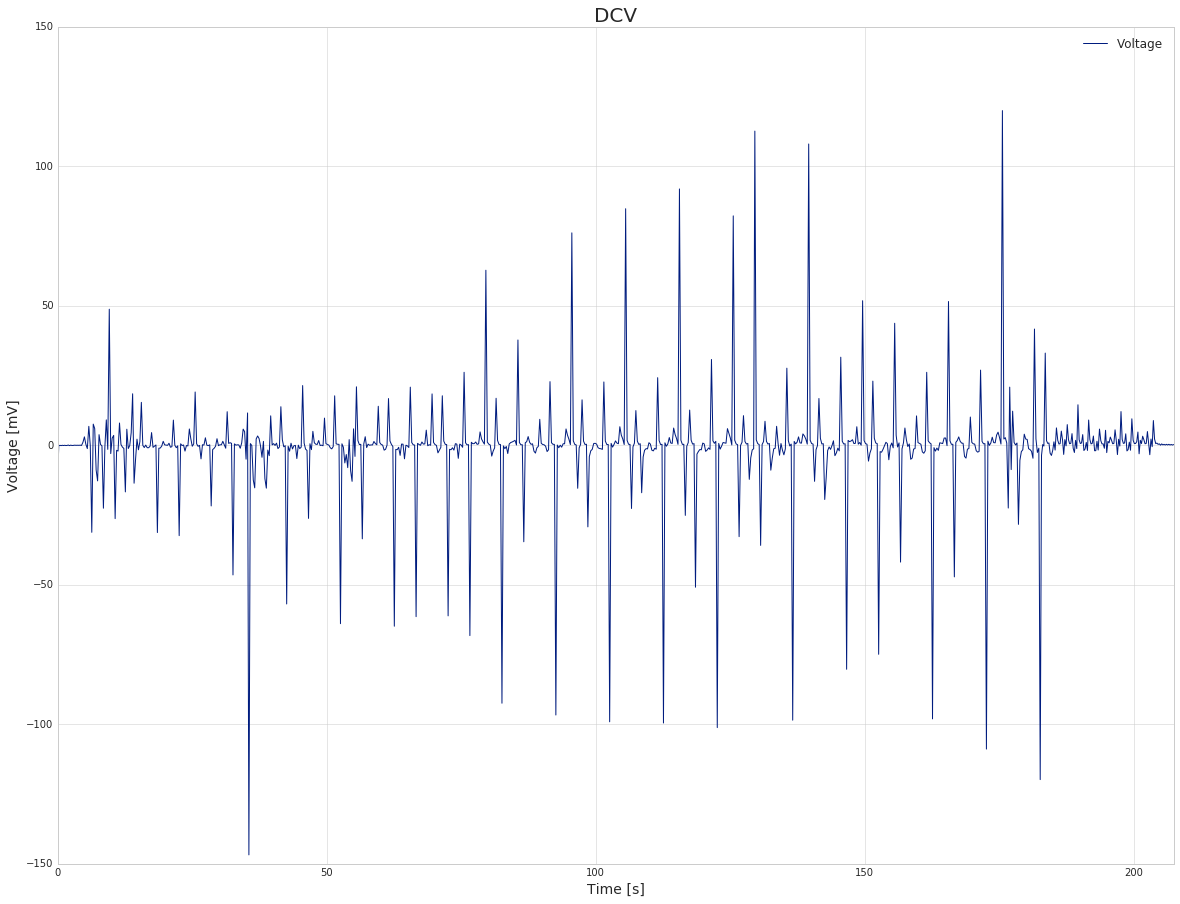

In [25]:
# we are using the inline backend
#%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt

ax = df.plot(kind='line', x='Time', y='Voltage',figsize=(20, 15))

ax.set_title('DCV',fontsize=20)
ax.set_ylabel('Voltage [mV]',fontsize=14)
ax.set_xlabel('Time [s]',fontsize=14)

 
#plot1.plot()

In [5]:
print(plt.style.available)


['seaborn-paper', 'seaborn-whitegrid', 'dark_background', 'ggplot', 'seaborn-darkgrid', 'seaborn-bright', 'seaborn-muted', 'fivethirtyeight', 'classic', 'seaborn-talk', 'seaborn-deep', 'seaborn-dark', 'seaborn-poster', 'seaborn-white', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-ticks', 'bmh', 'grayscale', 'seaborn-pastel', 'seaborn-notebook']


In [302]:
df.rename(columns={'Dmm1_Time(s)(1)(1)':'Time1', 'mV':'Voltage1',
                  'Dmm1_Time(s)(1)(1).1':'Time2', 'mV.1':'Voltage2',
                  'Dmm1_Time(s)(1)(1).2':'Time3', 'mV.2':'Voltage3'}, inplace=True)
df.head()

,Time1,Voltage1,Time2,Voltage2,Time3,Voltage3
0,0.000000,-0.008105,0.000000,-0.011160,0.000000,-0.006954
1,0.220980,-0.008012,0.220975,-0.011138,0.220973,-0.007719
2,0.441953,-0.006037,0.441948,-0.010368,0.441947,-0.006855
3,0.662924,-0.007068,0.662921,-0.012962,0.662919,-0.006759
4,0.883895,-0.007218,0.883891,-0.012040,0.883893,-0.007251


In [247]:
import pandas as pd # primary data structure library

In [301]:
df = pd.read_excel(r"test2.xlsx",delimiter =';',decimal=",",sheet_name="1")
cols = [0,2,4,5,6,8,10,11,12,14,16,17]
df.drop(df.columns[cols], axis=1, inplace=True)
df.head()

,Dmm1_Time(s)(1)(1),mV,Dmm1_Time(s)(1)(1).1,mV.1,Dmm1_Time(s)(1)(1).2,mV.2
0,0.000000,-0.008105,0.000000,-0.011160,0.000000,-0.006954
1,0.220980,-0.008012,0.220975,-0.011138,0.220973,-0.007719
2,0.441953,-0.006037,0.441948,-0.010368,0.441947,-0.006855
3,0.662924,-0.007068,0.662921,-0.012962,0.662919,-0.006759
4,0.883895,-0.007218,0.883891,-0.012040,0.883893,-0.007251


In [303]:
#cutting rows above 260

df=df[:260] 
df.head()

,Time1,Voltage1,Time2,Voltage2,Time3,Voltage3
0,0.000000,-0.008105,0.000000,-0.011160,0.000000,-0.006954
1,0.220980,-0.008012,0.220975,-0.011138,0.220973,-0.007719
2,0.441953,-0.006037,0.441948,-0.010368,0.441947,-0.006855
3,0.662924,-0.007068,0.662921,-0.012962,0.662919,-0.006759
4,0.883895,-0.007218,0.883891,-0.012040,0.883893,-0.007251


/home/jupyterlab/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:51: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return getattr(obj, method)(*args, **kwds)


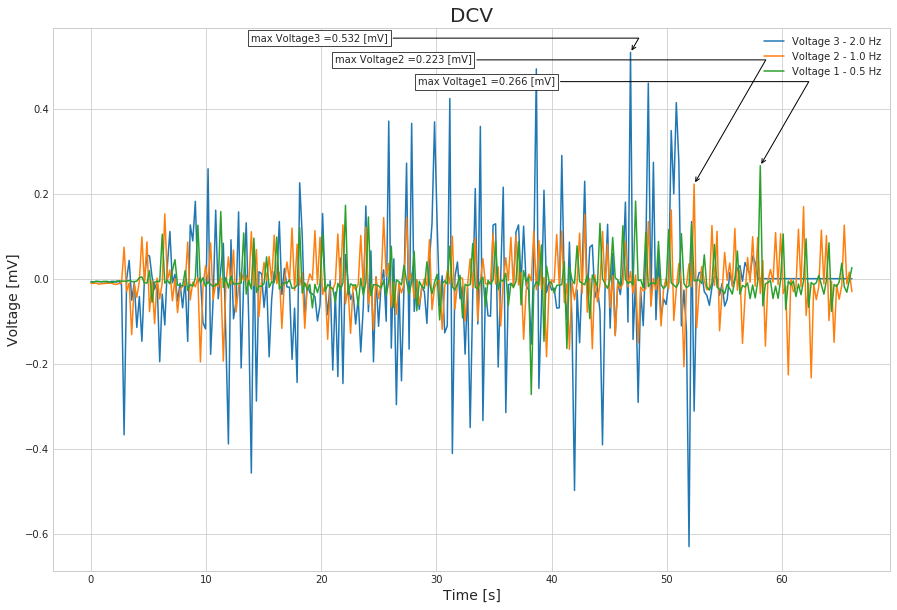

In [309]:
import numpy as np
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')



Time = df['Time1']
V1=df['Voltage1']
V2=df['Voltage2']
V3=df['Voltage3']

fig = plt.figure(figsize=(15, 10))
ax = plt.axes()

plt.plot(Time, V3, label='Voltage 3 - 2.0 Hz')
plt.plot(Time, V2, label='Voltage 2 - 1.0 Hz')
plt.plot(Time, V1, label='Voltage 1 - 0.5 Hz')





plt.xlabel('Time [s]',fontsize=14)
plt.ylabel('Voltage [mV]',fontsize=14)
plt.title('DCV',fontsize=20)
#plt.xlim(0, 60)
plt.legend()



def annot_max(x, y, xt, yt ,ax=None):
    xmax = x[np.argmax(y)]
    ymax = y.max()
    text= "max {:s} ={:.3f} [mV]".format(y.name, ymax)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(xt,yt), **kw)

annot_max(Time,V1,0.6,0.91)
annot_max(Time,V2,0.5,0.95)
annot_max(Time,V3,0.4,0.99)

